In [1]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
pd.set_option('display.max_colwidth', 500)

In [2]:
def tweet_scraper(query, n_tweet):

    attributes_container = []
    max_tweet = n_tweet

    for i,tweet in enumerate(sntwitter.TwitterSearchScraper(query).get_items()):

        if i>max_tweet:
            break
            
        attributes_container.append([tweet.user.username,
                                    tweet.user.followersCount,
                                    tweet.user.friendsCount,
                                    tweet.retweetCount,
                                    tweet.lang,
                                    tweet.date,
                                    tweet.likeCount,
                                    tweet.id,
                                    tweet.content,
                                    tweet.hashtags,
                                    tweet.coordinates,
                                    tweet.place])
        
    return pd.DataFrame(attributes_container, columns=["User",
                                                    "Follows_Count",
                                                    "Friends_Count",
                                                    "Retweet_Count",
                                                    "Language",
                                                    "Date_Tweet",
                                                    "Number_of_Likes",
                                                    "Tweet_Id",
                                                    "Tweet",
                                                    "Hashtags",
                                                    "Coordinates",
                                                    "Place"])

In [3]:
ps = tweet_scraper('(patient safety) since:2010-01-01 until:2022-12-31', 250000)
ps.to_csv('patient_safety.csv', index=False)

/tmp/ipykernel_18402/3358869285.py:19: FutureWarning: content is deprecated, use rawContent instead
  tweet.content,


In [4]:
df = pd.read_csv('patient_safety2.csv', encoding='utf-8')
df.head()

,User,Follows_Count,Friends_Count,Retweet_Count,Language,Date_Tweet,Number_of_Likes,Tweet_Id,Tweet,Hashtags,Coordinates,Place
0,ZKusynova,557,193,0,en,2022-12-05 10:01:31+00:00,0,"1,59970551827612E+018","It is encouraging to see that the @WHO ""Global Patient Safety Action Plan 2021–2030: Pandemic and beyond"" is translating into #patientsafety health sector policies and programmes. At this weeks' WHO consultation, we'll discuss reporting and sharing of results. @FIP_org",['patientsafety'],NaN,NaN
1,EllieGray6272,483,432,0,en,2022-12-05 10:00:44+00:00,0,"1,59970532305262E+018",@DocMCohen @DrAseemMalhotra Says the unethical MD who puts #BigPharma profits above patient safety.,['BigPharma'],NaN,NaN
2,ParamountB,329,816,0,en,2022-12-05 10:00:33+00:00,0,"1,59970527413848E+018","👉Shop now &amp; get 10% Discount: \n""FIRST AID &amp; PATIENT SAFETY 3ED"" by Atiq Ur Rehman:\n\n#firstaid #cpr #firstaidtraining #emergency #medical #medicine #health #rescue #nurse #Paramountbooks #paramountmedicalbooks #MedicalBooks #MedicalStudent #Discount https://t.co/P1TTSYeckf","['firstaid', 'cpr', 'firstaidtraining', 'emergency', 'medical', 'medicine', 'health', 'rescue', 'nurse', 'Paramountbooks', 'paramountmedicalbooks', 'MedicalBooks', 'MedicalStudent', 'Discount']",NaN,NaN
3,Ksehmi5,281,51,0,en,2022-12-05 09:54:06+00:00,0,"1,59970365237706E+018",@Mondher_Letaief ground breaking work been carried on in #patientsafety #GlobalPatientSafetyActionPlan by @WHOEMRO Member States despite the enormous challenges in the Region. We need to tailor-make the #GPSAP2030 to adjust for national ecosystems and legacy of conflict https://t.co/msrio0jW0V,"['patientsafety', 'GlobalPatientSafetyActionPlan', 'GPSAP2030']","Coordinates(longitude=6.046126, latitude=46.2171765)","Place(fullName='Meyrin, Suisse', name='Meyrin', type='city', country='Switzerland', countryCode='CH')"
4,7Sebe,696,1730,0,en,2022-12-05 09:52:32+00:00,2,"1,59970325797867E+018","Reality of today’s NHS approach to #patientsafety when big expensive management consultancy firms tell us how to deliver healthcare: \nIncentivised unsafe conditions, overworked and underpaid demoralised staff. \nThis has to change. \nTime for #fullpayrestoration","['patientsafety', 'fullpayrestoration']",NaN,NaN


In [5]:
df.columns

Index(['User', 'Follows_Count', 'Friends_Count', 'Retweet_Count', 'Language',
       'Date_Tweet', 'Number_of_Likes', 'Tweet_Id', 'Tweet', 'Hashtags',
       'Coordinates', 'Place'],
      dtype='object')

In [19]:
data = df[['User', 'Date_Tweet', 'Tweet', 'Language', 'Hashtags','Place', 'Follows_Count', 'Friends_Count', 'Retweet_Count', 
        'Number_of_Likes']]

In [20]:
import pandas as pd
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [21]:
data.Tweet.duplicated().sum()

3509

In [22]:
data = data.drop_duplicates(subset=['Tweet'], keep='first')

In [23]:
#tweets lang

data_en = data[data['Language'] == 'en']
data_en.shape

(236955, 10)

In [24]:
data.isna().sum()

User                    0
Date_Tweet              0
Tweet                   0
Language                0
Hashtags            93966
Place              238786
Follows_Count           0
Friends_Count           0
Retweet_Count           0
Number_of_Likes         0
dtype: int64

In [25]:
data.Tweet = data.Tweet.astype(str)

In [32]:
df = data.copy()
df.columns = df.columns.str.lower()

In [33]:
# kullanıcı sayısı ve tweet sayısı

print(f'{df.shape[0]} tweets from different {df.user.nunique()} unique users')

246470 tweets from different 73698 unique users


In [ ]:
df.date_tweet = pd.to_datetime(df.date_tweet)
df['year']= df.date_tweet.dt.year
df['month'] = df.date_tweet.dt.month_name()    
df['day'] = df.date_tweet.dt.day_name()
df.head()

In [35]:
df['year'].value_counts()

2020    89350
2022    80567
2021    75155
2019     1398
Name: year, dtype: int64

ValueError: 'label' must be of length 'x'

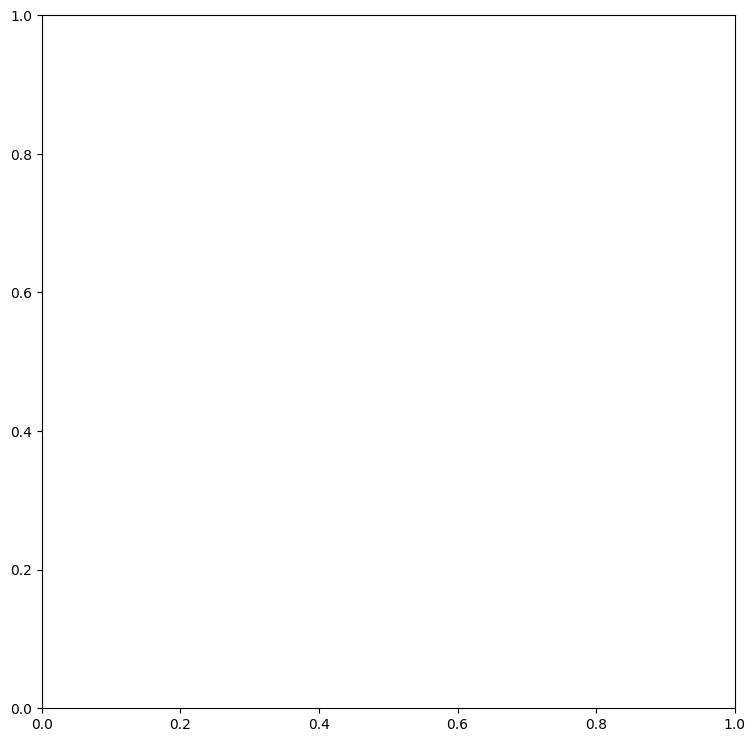

In [36]:
# Datada yer alan tweetlerin yıllara göre dağılımı
plt.figure(figsize=(9,9))
plt.pie(df.year.value_counts(), labels=['2020 Tweets', '2022 Tweets', '2021 Tweets'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'],\
 startangle=90, textprops={'fontsize': 14}, wedgeprops=dict(width=0.3), explode=(0.05,0,0), shadow=True, pctdistance=0.85,\
    labeldistance=1.1, radius=1.2, counterclock=False, center=(0,0), frame=False)
plt.legend(loc='upper right')
plt.show()